In [1]:
include("src/Trajectories.jl")
using .QuTaM

In [2]:
using LinearAlgebra

In [3]:
# Create a data set of trajectories
# Using rf as basis
sys = QuTaM.rd_sys
params = QuTaM.rd_params

SimulParameters(psi0=ComplexF64[0.0 + 0.0im, 1.0 + 0.0im]
nsamples=50000
seed=1
ntraj=1000)
multiplier=10.5
tf=3.0
dt=0.00063
eps=0.001)

In [4]:
# Now from each trajectory, generate the states the given times
sample_clicks = QuTaM.run_trajectories(sys, params)
ntimes = 1000
t = collect(LinRange(0, params.tf, ntimes))
sample = Array{ComplexF64}(undef, params.ntraj, ntimes, sys.NLEVELS );
for n in 1:params.ntraj
        sample[n, :, :] = QuTaM.evaluate_at_t(t, sample_clicks[n], sys,  params.psi0)
end 
# Check unitarity of the sample
flag = true
for k in 1:ntimes
    for n in 1:params.ntraj
        if (norm(sample[n, k, :]) - 1) > 0.01
            flag = !flag
            print(n, k, "\n")
            break
        end 
    end 
end 
if flag
    print("The sample is full of unitary states")
end 

The sample is full of unitary states

In [5]:
# Obtain the observable on the sample
x_sample = zeros(ComplexF64, params.ntraj, ntimes)
for tn in 1:ntimes
    for k in 1:params.ntraj 
        x_sample[k, tn] = dot(sample[k, tn, :], QuTaM.sigma_z * sample[k, tn, :])   # Drop the extra dimension
    end
end 

In [6]:
# Average 
using Statistics
x = real(dropdims( mean(x_sample, dims=1), dims=1));

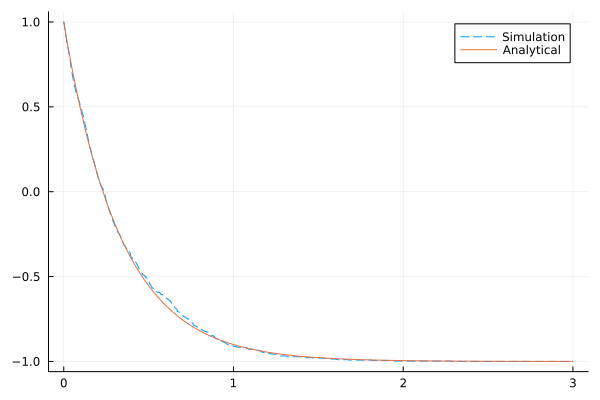

In [7]:
using Plots
plot(t, x, label="Simulation", line=:dash)
plot!(t, 2*exp.(-QuTaM.rd_gamma.*t).-1, label="Analytical")

In [14]:
# Obtain the integrated normalized error
x_theo = 2*exp.(-QuTaM.rd_gamma.*t).-1
error = sum(abs.( (x - x_theo) ./ x_theo)) / (sum(abs.(x_theo))) 


0.053575195278252566